**Libraries**

In [ ]:
#library importing
import pandas as pd #data analysis
import numpy as np #operations with arrays and matrices
import seaborn as sns #visualize the data set
import matplotlib as plt #same
import warnings # avoid unnecessary info printed by models

**Dataset**

In [ ]:
# Loading the Dataset

df=pd.read_csv('/content/Train.csv') #importing the training dataset
df.head() #printing top-5 rows of data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df

In [ ]:
#statistical info
df.describe() #numerical description of data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.info() #datatype of attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int64  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Outlet_Years               8523 non-null   int64  
 9   Outlet                     8523 non-null   int64  
 10  Item_Fat_Content_0         8523 non-null   uint8  
 11  Item_Fat_Content_1         8523 non-null   uint8  
 12  Item_Fat_Content_2         8523 non-null   uint8  
 13  Outlet_Size_0              8523 non-null   uint8

In [ ]:
#check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
#check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#check for categorical attributes
cat_col=[]
for x in df.dtypes.index:
  if df.dtypes[x]=='object':
    cat_col.append(x)
cat_col

#This code is creating a list cat_col that contains the names of columns in a DataFrame df where the data type is 'object'.
#In the context of pandas, the data type 'object' usually indicates that the column contains string or mixed types.

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
#we dont need item dentifier and outlet identifier. so, we will remove them from the list
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')


In [ ]:
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
#print categorical columns
for col in cat_col:
  print(col)
  print(df[col].value_counts())
  print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [ ]:
#first fill the null values/missing values
#we will get the mean
item_weight_mean=df.pivot_table(values="Item_Weight",index='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [ ]:
#get info of missing values
miss_bool=df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [ ]:
for i,item in enumerate(df['Item_Identifier']):
  if miss_bool[i]:
    if item in item_weight_mean:
      df['Item_Weight'][i]=item_weight_mean.loc[item]['Item_Weight']
    else:
      df['Item_Weight'][i]=0

#data imputation process for a DataFrame df where missing values (miss_bool) in the "Item_Weight" column are being filled
#imputation strategy for missing "Item_Weight" values. If the "Item_Identifier" is found in item_weight_mean, the missing "Item_Weight" value is filled with the mean value for that specific item.
#If the "Item_Identifier" is not in item_weight_mean, it fills the missing value with 0.

<ipython-input-15-5d0e6cb96ff5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Weight'][i]=0


In [ ]:
df['Item_Weight'].isnull().sum()

0

In [ ]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode
#outlet_size_mode will be a DataFrame where the columns represent unique "Outlet_Type" values, and the values in each column represent the mode of "Outlet_Size" for that specific "Outlet_Type".
#This information can be useful for imputing missing values in the "Outlet_Size" column based on the mode of the corresponding "Outlet_Type".


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [ ]:
df['Outlet_Size'].isnull().sum()

0

In [ ]:
sum(df['Item_Visibility']==0)

526

In [ ]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)


In [ ]:
sum(df['Item_Visibility']==0)

0

In [ ]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']
#the "New_Item_Type" column will contain the first two characters of each value in the "Item_Identifier" column.
#This could be useful for creating a new categorical variable based on the first two characters of the item identifier, capturing some specific information about the items.


0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [ ]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()


Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [ ]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [ ]:
# create small values for establishment year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']


In [ ]:
df['Outlet_Years']


0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn is particularly well-suited for visualizing complex datasets with multiple variables.

<ipython-input-30-fe02bceea881>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


<Axes: xlabel='Item_Weight', ylabel='Density'>

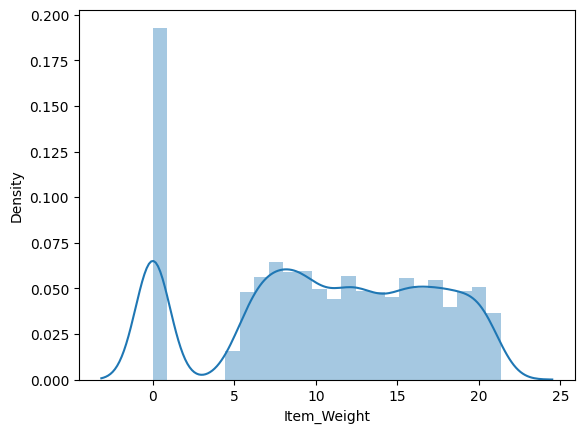

In [ ]:
sns.distplot(df['Item_Weight'])
#This function from the seaborn library is used to create a histogram along with a kernel density estimate (KDE) plot.
#The histogram visualizes the distribution of the "Item_Weight" values, and the KDE plot provides a smoothed estimate of the probability density function.


<ipython-input-31-686ffc08fab6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


<Axes: xlabel='Item_Visibility', ylabel='Density'>

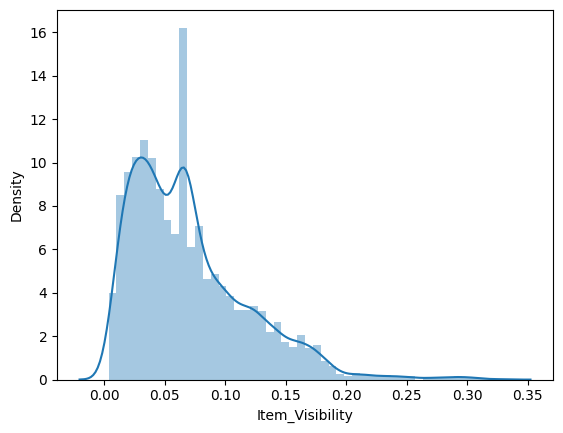

In [ ]:
sns.distplot(df['Item_Visibility'])

<ipython-input-32-cd5761e8e3f5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


<Axes: xlabel='Item_MRP', ylabel='Density'>

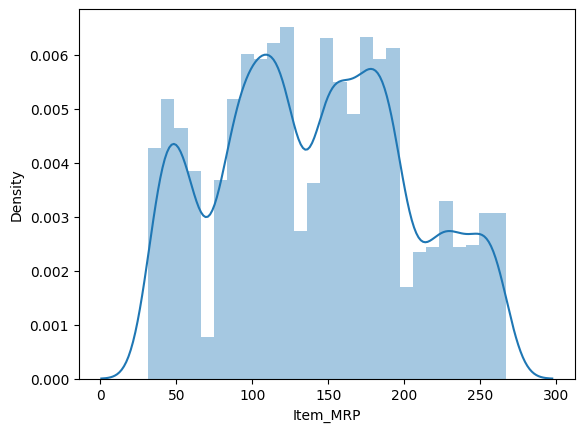

In [ ]:
sns.distplot(df['Item_MRP'])


<ipython-input-33-db3ed12f69e9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

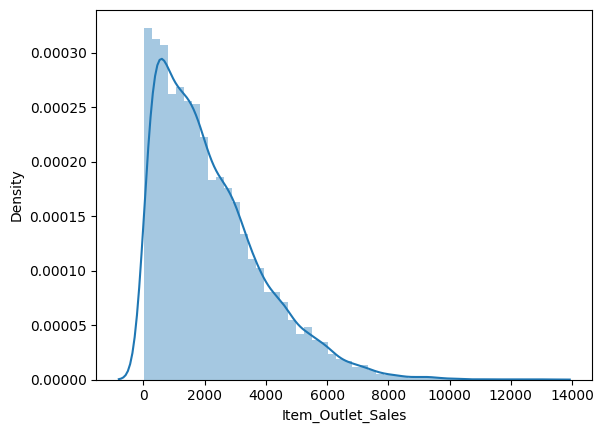

In [ ]:
sns.distplot(df['Item_Outlet_Sales'])

In [ ]:
# log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])
#Log transformation helps to normalize the distribution of the target variable.


<ipython-input-35-db3ed12f69e9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

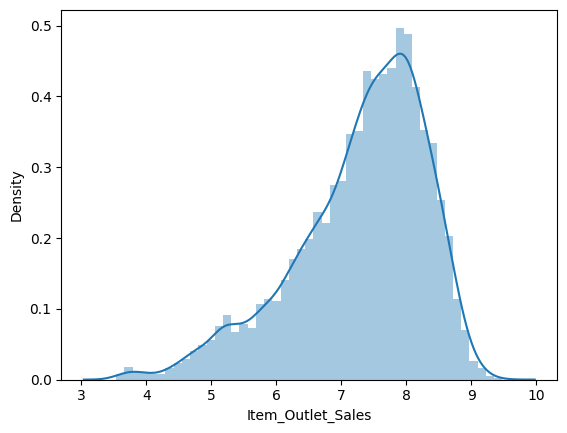

In [ ]:

sns.distplot(df['Item_Outlet_Sales'])

<ipython-input-78-913e71632430>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<function matplotlib.pyplot.show(close=None, block=None)>

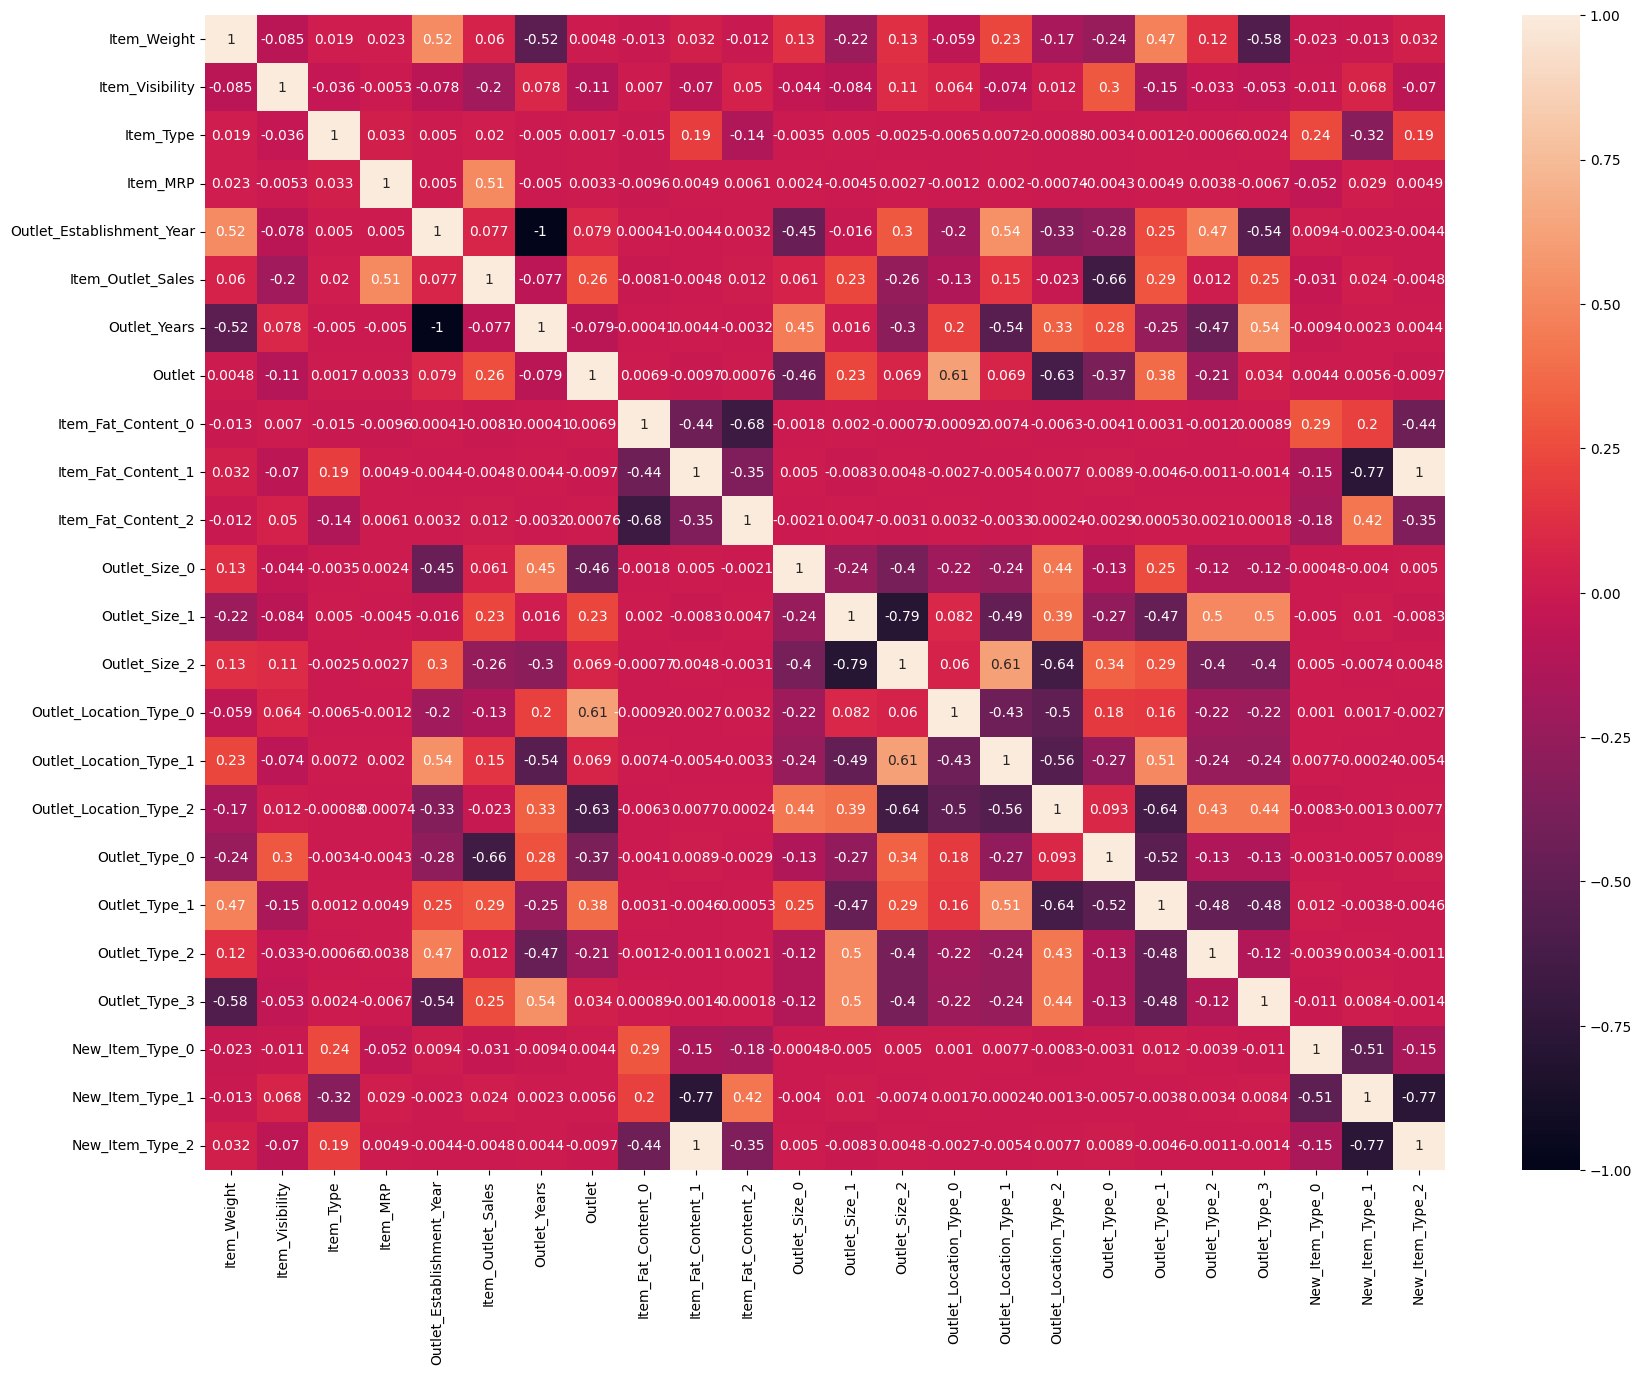

In [ ]:
plt.figure(figsize=(20,15)) #20incheswide 15inchestall
sns.heatmap(df.corr(),annot=True)
plt.show

In [ ]:
!pip install Klib

In [ ]:
import klib

GridSpec(6, 2)

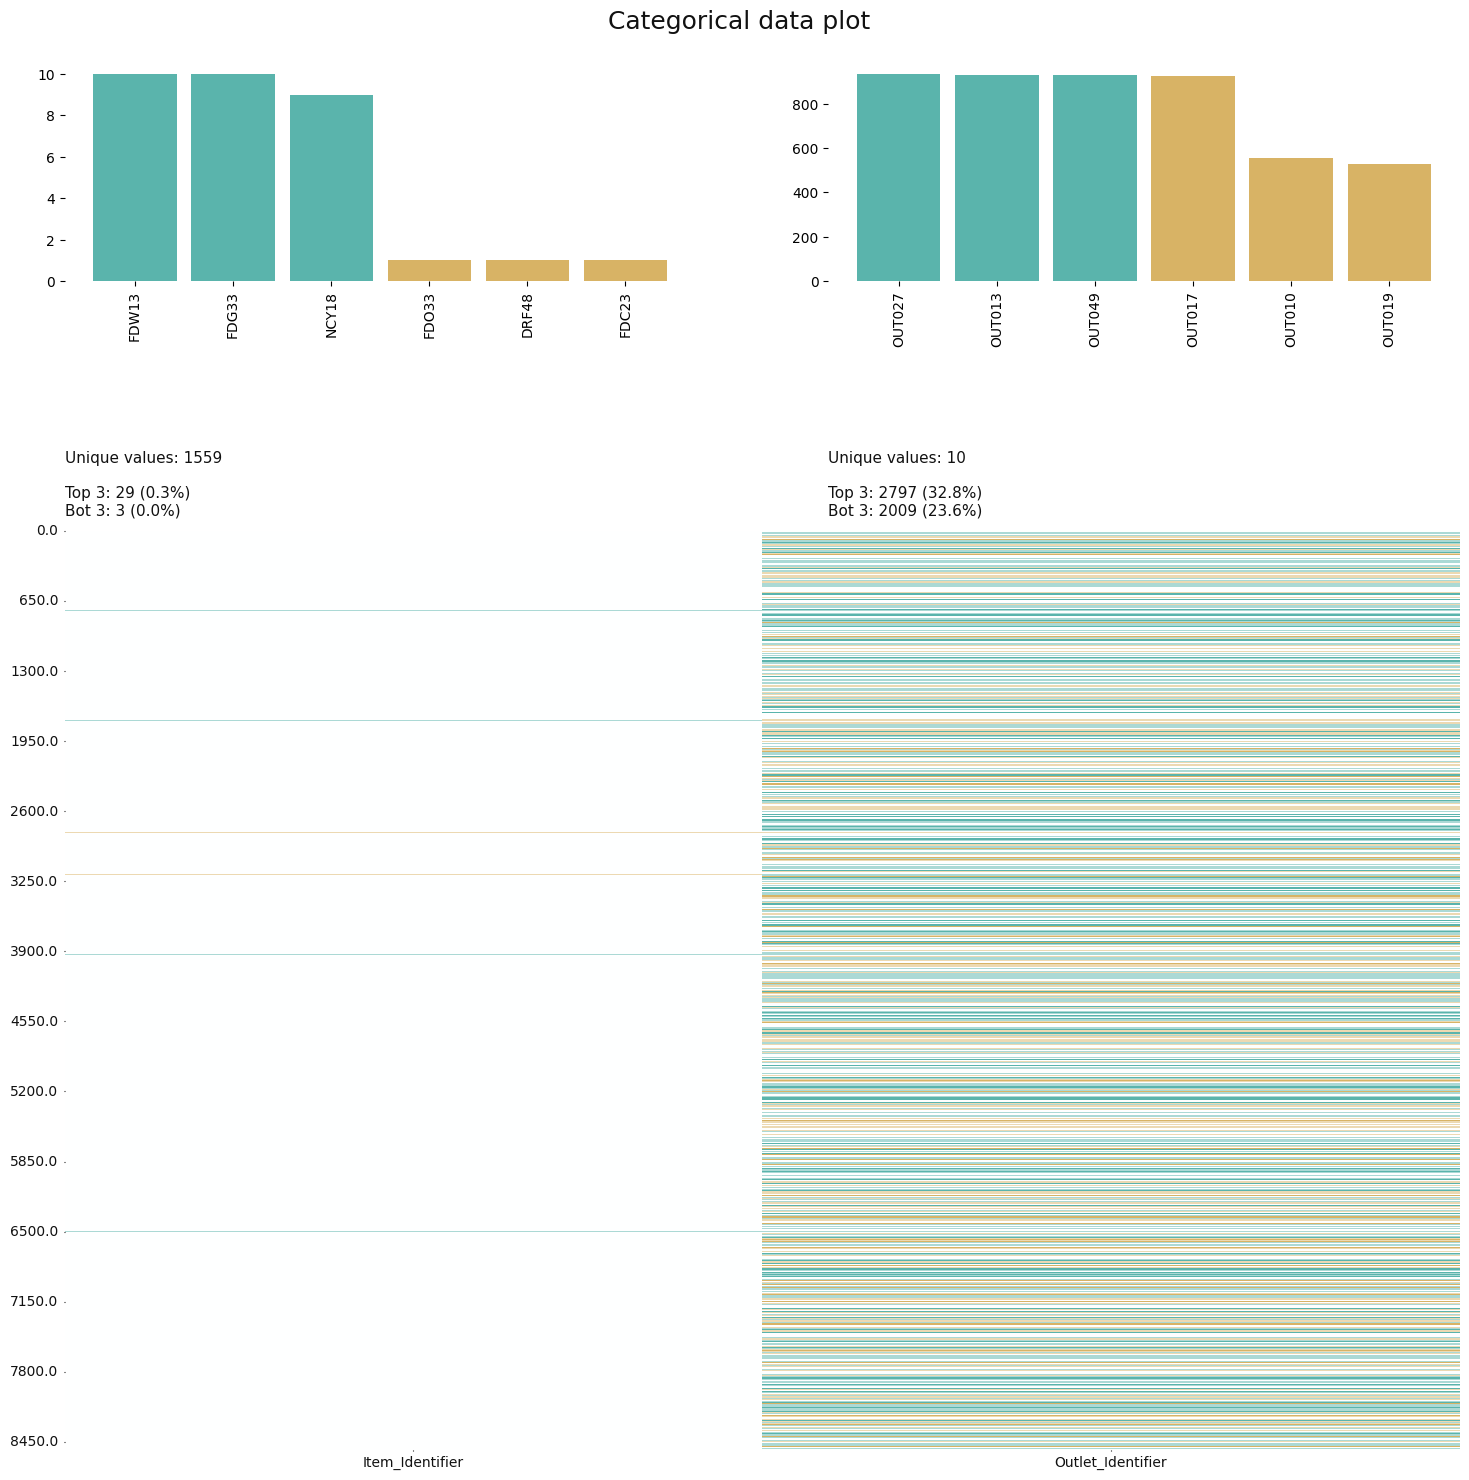

In [ ]:
# klib.describe - functions for visualizing datasets
klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features

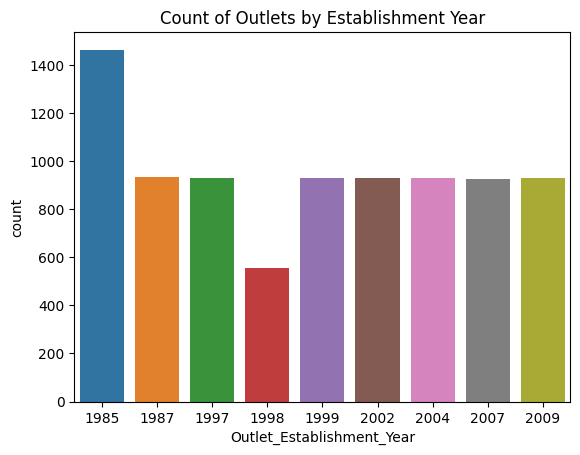

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.title("Count of Outlets by Establishment Year")
plt.show()


<ipython-input-44-bda1a0304f9f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

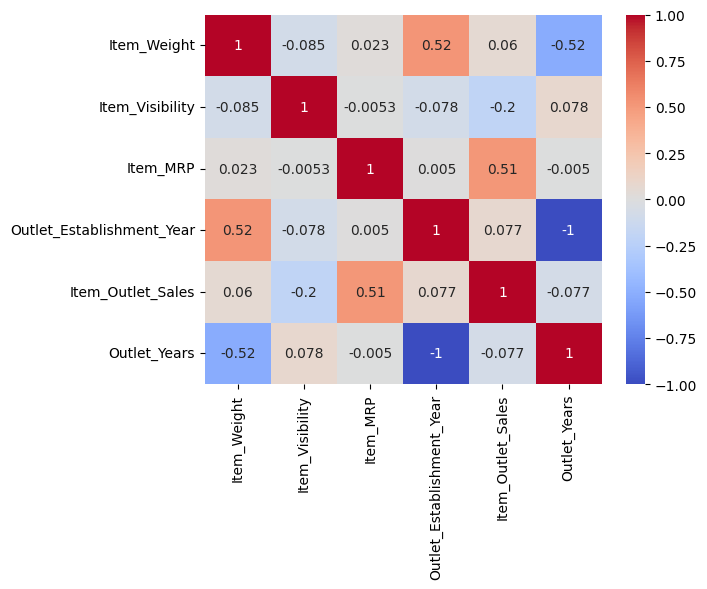

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


Modelling

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #Label encoding is a process of converting categorical data into numerical format
df['Outlet'] = le.fit_transform(df['Outlet_Identifier']) # Encode the 'Outlet_Identifier' column and create a new 'Outlet' column
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])
#the specified categorical columns in the DataFrame df will be replaced with numerical labels

In [ ]:

df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()
#using the get_dummies function from the pandas library to perform one-hot encoding on specified categorical columns in a DataFrame (df).
#One-hot encoding is a technique used to convert categorical variables into a binary matrix (0s and 1s), where each category is represented by a separate column
#1 indicates the presence of that category, and 0 indicates its absence

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


**Splitting of DF**

X will contain the features (independent variables) without the columns specified in the drop method, and y will contain the target variable (dependent variable), which is the 'Item_Outlet_Sales' column

In [ ]:
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales'] #target variable
#splitting df into two one is train and other is test or target variable againest which we will be testing our algos

In [ ]:
X

In [ ]:
from sklearn.model_selection import cross_val_score
#sklearn.model_selection: Provides tools for model selection and evaluation, including functions for cross-validation and hyperparameter tuning
from sklearn.metrics import mean_squared_error
#sklearn.metrics: Provides various metrics for evaluating model performance, including accuracy, precision, recall, and others.
def train(model, X, y):
    # train the model
    model.fit(X, y) #trains the machine learning model (model) using the feature matrix (X) and target variable (y)

    # predict the training set
    pred = model.predict(X) #predictions (pred) on the training set (X)

    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    #performs cross-validation and returns an array of negative mean squared errors
    #(negative because scikit-learn convention for scoring is to maximize, so for error metrics, it returns the negation of the metric)

    cv_score = np.abs(np.mean(cv_score))
    #takes the absolute mean of the cross-validated scores, converting back to positive because lower MSE is better

    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 0.2880065032501795
CV Score: 0.28913554008167247
Model Report
MSE: 0.28803593832455576
CV Score: 0.2891442354976059
Model Report
MSE: 1.0305333080087593
CV Score: 1.030781898345697


<Axes: title={'center': 'Model Coefficients'}>

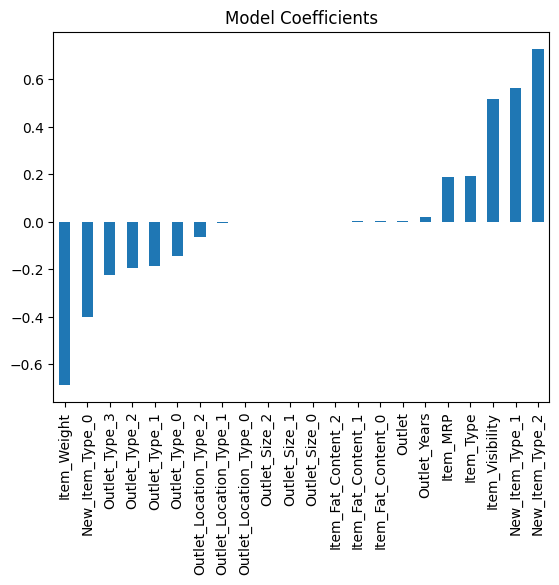

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso #sklearn.linear_model: Includes linear models for regression and classification tasks
from sklearn.preprocessing import StandardScaler #sklearn.preprocessing: Includes tools for preprocessing data, such as scaling, encoding categorical variables, and imputing missing values
import pandas as pd


# Linear Regression
model = LinearRegression() #creates an instance of the Linear Regression model
scaler = StandardScaler()  #used to standardize (scale) the features
X_scaled = scaler.fit_transform(X) #scales the features
train(model, X_scaled, y)  #assumed to be a function that trains the mode
coef = pd.Series(model.coef_, X.columns).sort_values() # extracts the coefficients, creates a pandas Series, and sorts them.
coef.plot(kind='bar', title="Model Coefficients")

# Ridge Regression
model = Ridge()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
train(model, X_scaled, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

# Lasso Regression
model = Lasso()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
train(model, X_scaled, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")


The output for each regression method will be a bar chart where each bar represents the coefficient of a feature in the model. The length and direction of the bar indicate the strength and direction of the impact of that feature on the target variable.

If a bar is positive, it means an increase in that feature is associated with an increase in the target variable.
If a bar is negative, it means an increase in that feature is associated with a decrease in the target variable.
The height of the bars indicates the magnitude of the coefficient. Larger bars suggest a stronger influence of the corresponding feature on the model's predictions.

Mean Squared Error (MSE): This metric measures the average squared difference between the predicted values and the actual values. A lower MSE indicates better model performance on the training set. In your case, the first two models have very similar and low MSE values (around 0.288), suggesting good performance. However, the third model has a much higher MSE (1.030), indicating poorer performance.

Cross-Validated Mean Squared Error (CV Score): This metric provides an estimate of the model's performance on unseen data. Like MSE, lower values are better. In your case, the CV scores for the first two models are again very close (around 0.289), indicating consistent performance on different folds of the data during cross-validation. The third model, however, has a higher CV score (1.030), suggesting that its performance might not generalize well to new data.

**In summary, the first two models seem to perform similarly and well, while the third model performs worse, especially in terms of generalization to unseen data (as indicated by the higher CV score)**

Model trained
Predictions made
Cross-validation performed
Model Report
MSE: 5.5534030638578795e-34
CV Score: 0.5816027296180815


<Axes: title={'center': 'Feature Importance'}>

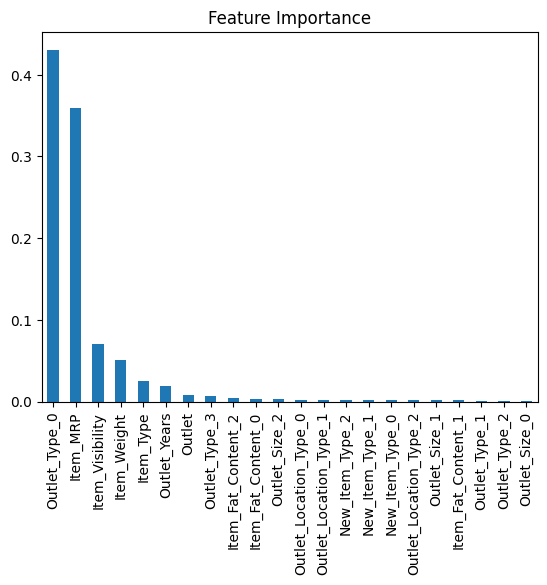

In [ ]:
from sklearn.tree import DecisionTreeRegressor #sklearn.tree: Includes decision tree-based models for classification and regression, such as Decision Trees and Random Forests
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")


Model Report
MSE: 0.042341995701403554
CV Score: 0.30954037976502136


<Axes: title={'center': 'Feature Importance'}>

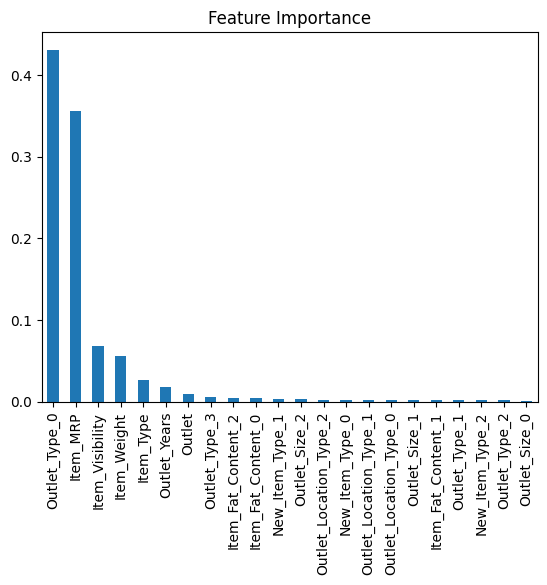

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model trained
Predictions made
Cross-validation performed
Model Report
MSE: 1.0418489584965893e-28
CV Score: 0.3325284296374164


<Axes: title={'center': 'Feature Importance'}>

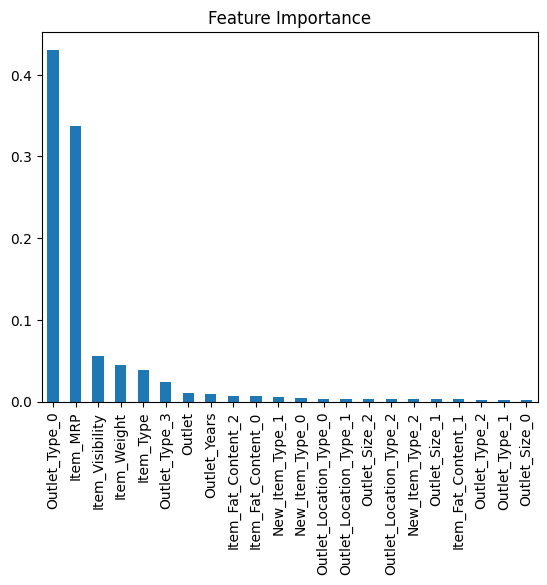

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor #sklearn.ensemble: Contains ensemble methods, including Random Forests, AdaBoost, and Gradient Boosting
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")